# Visualization with Haberman Dataset

## DataSet Details
* This dataset contains details of cancel survival patients who have undergone breast cancer surgery at University of Chicago Billings Hospital.
* The dataset has values of patients from year 1958 and 1970 
* Dataset has 4 columns:<br>
     Age: Age of patient when surgery took place<br>
     Year: Year of surgery(Years in 1900s)<br>
     Nodes: Number of Auxillary nodes detected<br>
     Status: 1- Indicates patient survived 5 or more years after surgery<br>2- Indicates patient expired within 5 years of surgery<br>
* Objective: To determine if a patient will survive more than 5 years or expire within 5 years of surgery

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'haberman.csv')

In [3]:
#Number of entries in dataset
dataset.shape

(306, 4)

In [4]:
#Datatypes and Columns info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [5]:
#No.of classes for each feature
for feature in dataset.columns:
    print(feature , ':', dataset.value_counts(feature).count())

age : 49
year : 12
nodes : 31
status : 2


In [6]:
#Data points per class
for feature in dataset.columns:
    print(dataset.value_counts(feature))

age
52    14
54    13
50    12
47    11
53    11
43    11
57    11
49    10
65    10
55    10
38    10
41    10
42     9
45     9
61     9
59     8
63     8
56     7
58     7
62     7
48     7
46     7
44     7
70     7
34     7
51     6
67     6
39     6
37     6
60     6
66     5
64     5
69     4
72     4
30     3
40     3
31     2
68     2
36     2
35     2
33     2
73     2
74     2
71     1
75     1
76     1
77     1
78     1
83     1
dtype: int64
year
58    36
64    31
63    30
60    28
65    28
66    28
59    27
61    26
67    25
62    23
68    13
69    11
dtype: int64
nodes
0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
11      4
14      4
19      3
23      3
22      3
15      3
10      3
20      2
12      2
17      1
18      1
16      1
21      1
24      1
25      1
28      1
30      1
35      1
46      1
52      1
dtype: int64
status
1    225
2     81
dtype: int64


## Univariate Analysis

#### Relation between each of independent variable on output

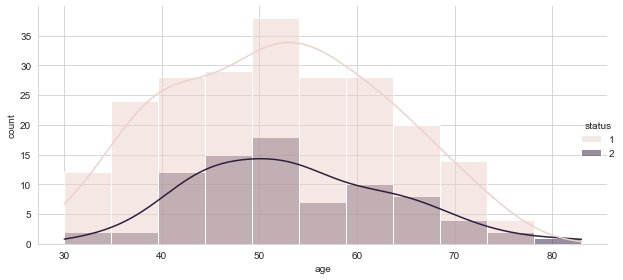

In [7]:
sns.set_style('whitegrid')
sns.displot(data=dataset,x='age',hue='status',kde='True',height=4,aspect=2).add_legend().set(xlabel='age',ylabel='count')


#### 
* From above it is observed that survival is not much dependent on age of the patient<br>
* However patients under age of 39 are highly likely to survive more than 5 years after surgery<br>
* Patients above age of 77 do not survive more than 5 years after surgery

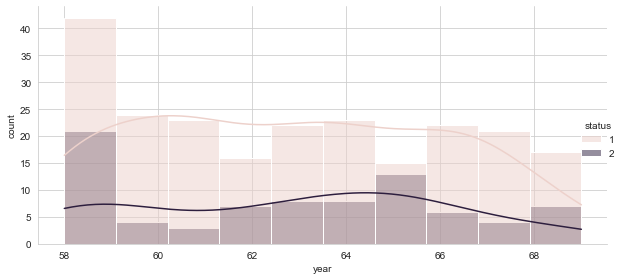

In [8]:
sns.set_style('whitegrid')
sns.displot(data=dataset,x='year',hue='status',kde='True',height=4,aspect=2).add_legend().set(xlabel='year',ylabel='count')

#### 
* Year 1958 data shows only 50% survival chance for more than 5years<br>
* Late 1964 and year 1965 shows very low survival rate for more than 5years<br>
* Year feature alone isnt showing much dependency on survival chance

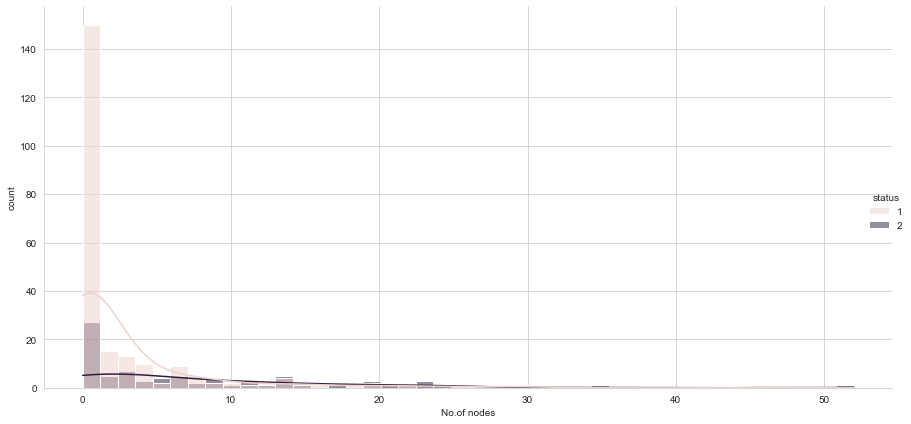

In [9]:
sns.set_style('whitegrid')
sns.displot(data=dataset,x='nodes',hue='status',kde='True',height=6,aspect=2).add_legend().set(xlabel='No.of nodes',ylabel='count')

#### 
* Graph shows patients with 0,1 Auxillary nodes have very high chance of survival for more than 5 years<br>


#### 
* Above PDFs for each feature suggest no single feature alone can be used to determine the outcome of 'Status'

In [10]:
dataset_status1= dataset[dataset['status']==1]
dataset_status1.shape

(225, 4)

In [11]:
dataset_status2= dataset[dataset['status']==2]
dataset_status2.shape

(81, 4)

#### CDF analysis

Status: Survived more than 5 yrs
bin_edges: [30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
pdf: [0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
cdf: [0.05333333 0.16       0.28444444 0.37777778 0.54222222 0.70666667
 0.8        0.91111111 0.97333333 1.        ]
------------------------------------------
Status: Survived less than 5 yrs
bin_edges: [34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]
pdf: [0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
cdf: [0.03703704 0.16049383 0.35802469 0.55555556 0.69135802 0.81481481
 0.91358025 0.96296296 0.98765432 1.        ]
------------------------------------------


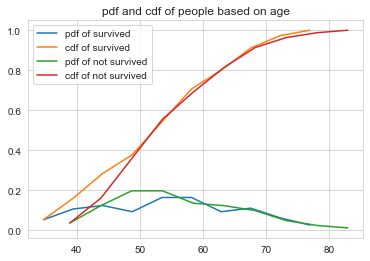

In [12]:
count, bin_edges = np.histogram(dataset_status1['age'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
Distribution_percent = pdf * 100
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
print('Status: Survived more than 5 yrs')
print('bin_edges: {}'.format(bin_edges))
print('pdf: {}'.format(pdf))
print('cdf: {}'.format(cdf))

print('------------------------------------------')

plt.title('pdf and cdf of people based on age')


count, bin_edges = np.histogram(dataset_status2['age'],bins=10,density=True)
pdf = count/(sum(count))
Distribution_percent = pdf * 100
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
print('Status: Survived less than 5 yrs')
print('bin_edges: {}'.format(bin_edges))
print('pdf: {}'.format(pdf))
print('cdf: {}'.format(cdf))
print('------------------------------------------')

plt.legend(['pdf of survived','cdf of survived','pdf of not survived','cdf of not survived'])

#### 
* Below 48 years, the probability of surviving more than 5 years is comparitively high
* But after age of 48 years, the chances of surviving more than 5 years or expire before 5 years of surgery is fairly similar.

Status: Survived more than 5 yrs
bin_edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
pdf: [0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
cdf: [0.18666667 0.29333333 0.39555556 0.46666667 0.56444444 0.66666667
 0.73333333 0.83111111 0.92444444 1.        ]
------------------------------------------
Status: Survived less than 5 yrs
bin_edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
pdf: [0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
cdf: [0.25925926 0.30864198 0.34567901 0.43209877 0.5308642  0.62962963
 0.79012346 0.86419753 0.91358025 1.        ]
------------------------------------------


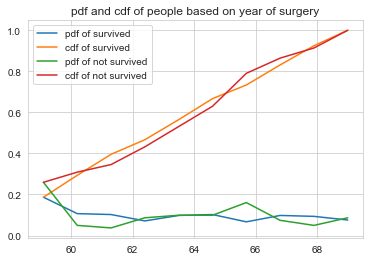

In [13]:
count, bin_edges = np.histogram(dataset_status1['year'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
print('Status: Survived more than 5 yrs')
print('bin_edges: {}'.format(bin_edges))
print('pdf: {}'.format(pdf))
print('cdf: {}'.format(cdf))
print('------------------------------------------')

plt.title('pdf and cdf of people based on year of surgery')


count, bin_edges = np.histogram(dataset_status2['year'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
print('Status: Survived less than 5 yrs')
print('bin_edges: {}'.format(bin_edges))
print('pdf: {}'.format(pdf))
print('cdf: {}'.format(cdf))
print('------------------------------------------')

plt.legend(['pdf of survived','cdf of survived','pdf of not survived','cdf of not survived'])

#### 
* Between 1961 to 1965, there were higher chances of patients surviving more than 5 years after surgery
* Between 1958 to 1960 and 1965 to 1967, the chances of patient not surviving were higher

Status: Survived more than 5 yrs
bin_edges: [ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
pdf: [0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
cdf: [0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]
------------------------------------------
Status: Survived less than 5 yrs
bin_edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
pdf: [0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
cdf: [0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]
------------------------------------------


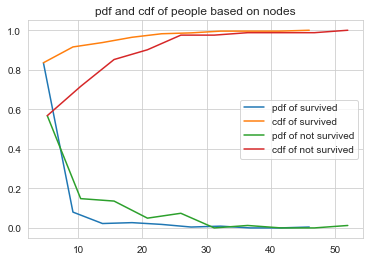

In [14]:
count, bin_edges = np.histogram(dataset_status1['nodes'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
print('Status: Survived more than 5 yrs')
print('bin_edges: {}'.format(bin_edges))
print('pdf: {}'.format(pdf))
print('cdf: {}'.format(cdf))
print('------------------------------------------')

plt.title('pdf and cdf of people based on nodes')


count, bin_edges = np.histogram(dataset_status2['nodes'],bins=10,density=True)
pdf = count/(sum(count))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
print('Status: Survived less than 5 yrs')
print('bin_edges: {}'.format(bin_edges))
print('pdf: {}'.format(pdf))
print('cdf: {}'.format(cdf))
print('------------------------------------------')

plt.legend(['pdf of survived','cdf of survived','pdf of not survived','cdf of not survived'])

#### 
* Patients with 4 or less than 4 auxillary nodes, have very high chances or surviving
* As the number of nodes increase more than 4, the probability of not surviving increased at a faster rate than of surviving

#### Box Plot

In [15]:
dataset.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


<AxesSubplot:xlabel='status', ylabel='age'>

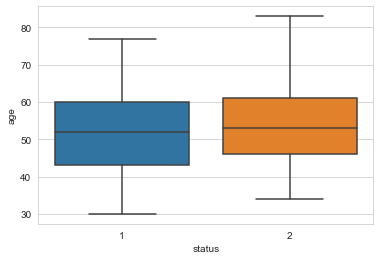

In [16]:
sns.boxplot(data=dataset,x='status',y='age')


<AxesSubplot:xlabel='status', ylabel='year'>

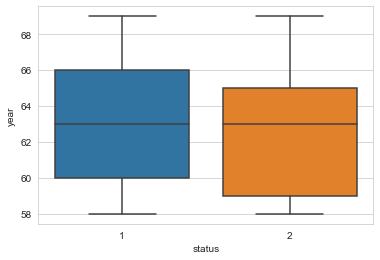

In [17]:
sns.boxplot(data=dataset,x='status',y='year')


<AxesSubplot:xlabel='status', ylabel='nodes'>

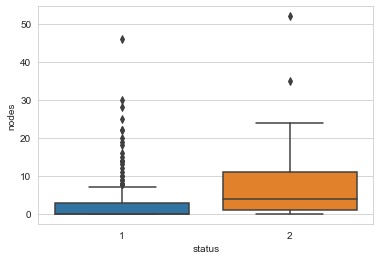

In [18]:
sns.boxplot(data=dataset,x='status',y='nodes')

#### 
* Above box plots show quartile values 
* Boxplot of Status vs Nodes shows, there are many outliers in the data and distribution is highly skewed. Other features of data are normal or nearly normal distributed

#### Violin plots

<AxesSubplot:xlabel='status', ylabel='age'>

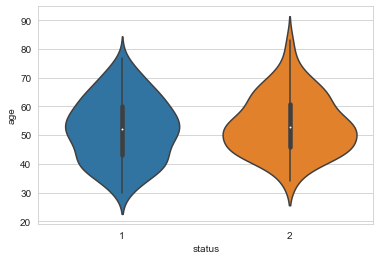

In [19]:
sns.violinplot(data=dataset,x='status',y='age')

<AxesSubplot:xlabel='status', ylabel='year'>

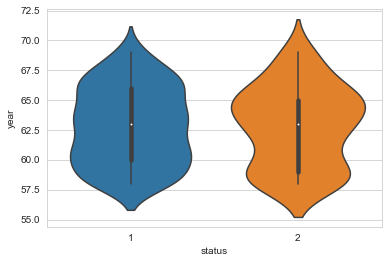

In [20]:
sns.violinplot(data=dataset,x='status',y='year')

<AxesSubplot:xlabel='status', ylabel='nodes'>

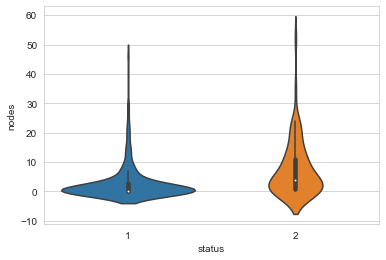

In [21]:
sns.violinplot(data=dataset,x='status',y='nodes')

#### 
* Voilin plots also show distribution of each feature wrt dependent variable.
* Nodes vs Status plot shows -<br>
    patients with more than 50 nodes do not survive<br>
    patients with more than 20 nodes have very less chances of surviving
* Age vs Status , Year vs Status voilin plots are not very distinct to draw any conclusions
    

### Bi-variate Analysis

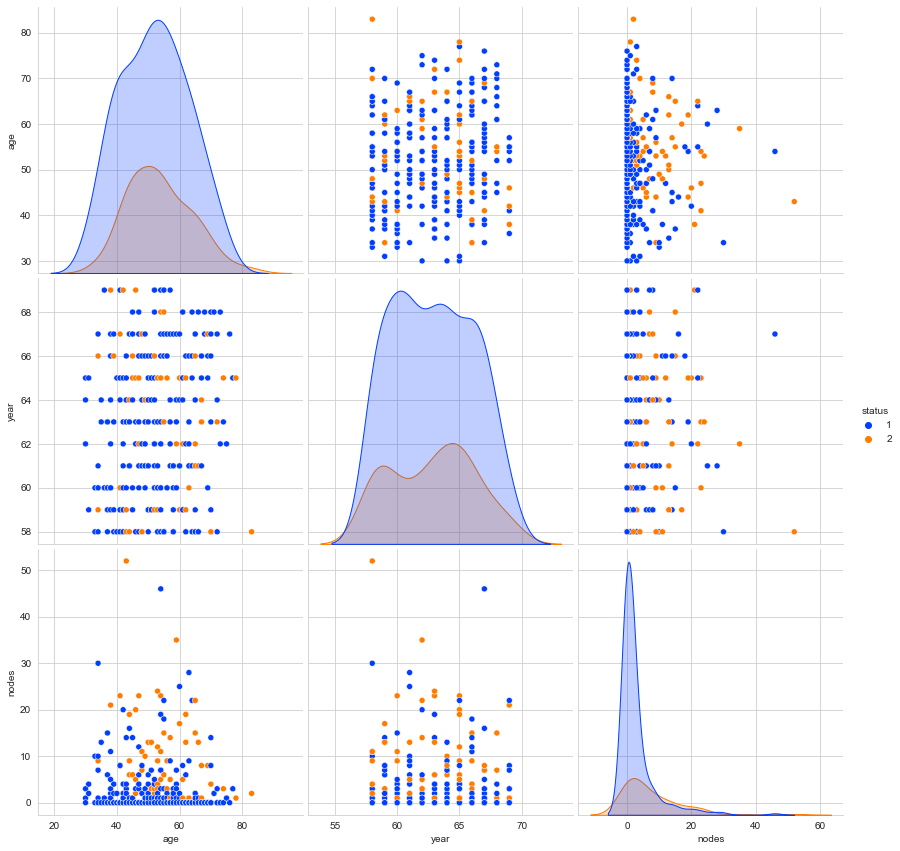

In [22]:
sns.set_style('whitegrid')
sns.pairplot(dataset,hue='status',height=4,palette='bright',diag_kind='kde')

#### 
* Above 2 variable scatter plots and distribution plots of pairplots show no two features are clearly sperated and 2D analysis doesnt give results of classification

### Summary


* Patients under age of 39 are highly likely to survive more than 5 years after surgery<br>
* Patients with 4 or less than 4 auxillary nodes, have very high chances or surviving<br>
* patients with more than 50 nodes do not survive<br>
* Patients above age of 77 do not survive more than 5 years after surgery<br>
